## Import Library

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
  
import warnings 
warnings.filterwarnings('ignore') 
  
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
  
import os 
import matplotlib.image as mpimg

## Importing Dataset 

In [2]:
from zipfile import ZipFile 
  
data_path = 'D:/starAgile/datasets/CNN/catdog/cats_and_dogs_filtered.zip'
  
with ZipFile(data_path, 'r') as zip: 
    zip.extractall() 
    print('The data set has been extracted.') 

The data set has been extracted.


## Data Visualization

In [3]:
path = 'cats_and_dogs_filtered'
classes = os.listdir(path) 
classes 

['train', 'validation', 'vectorize.py']

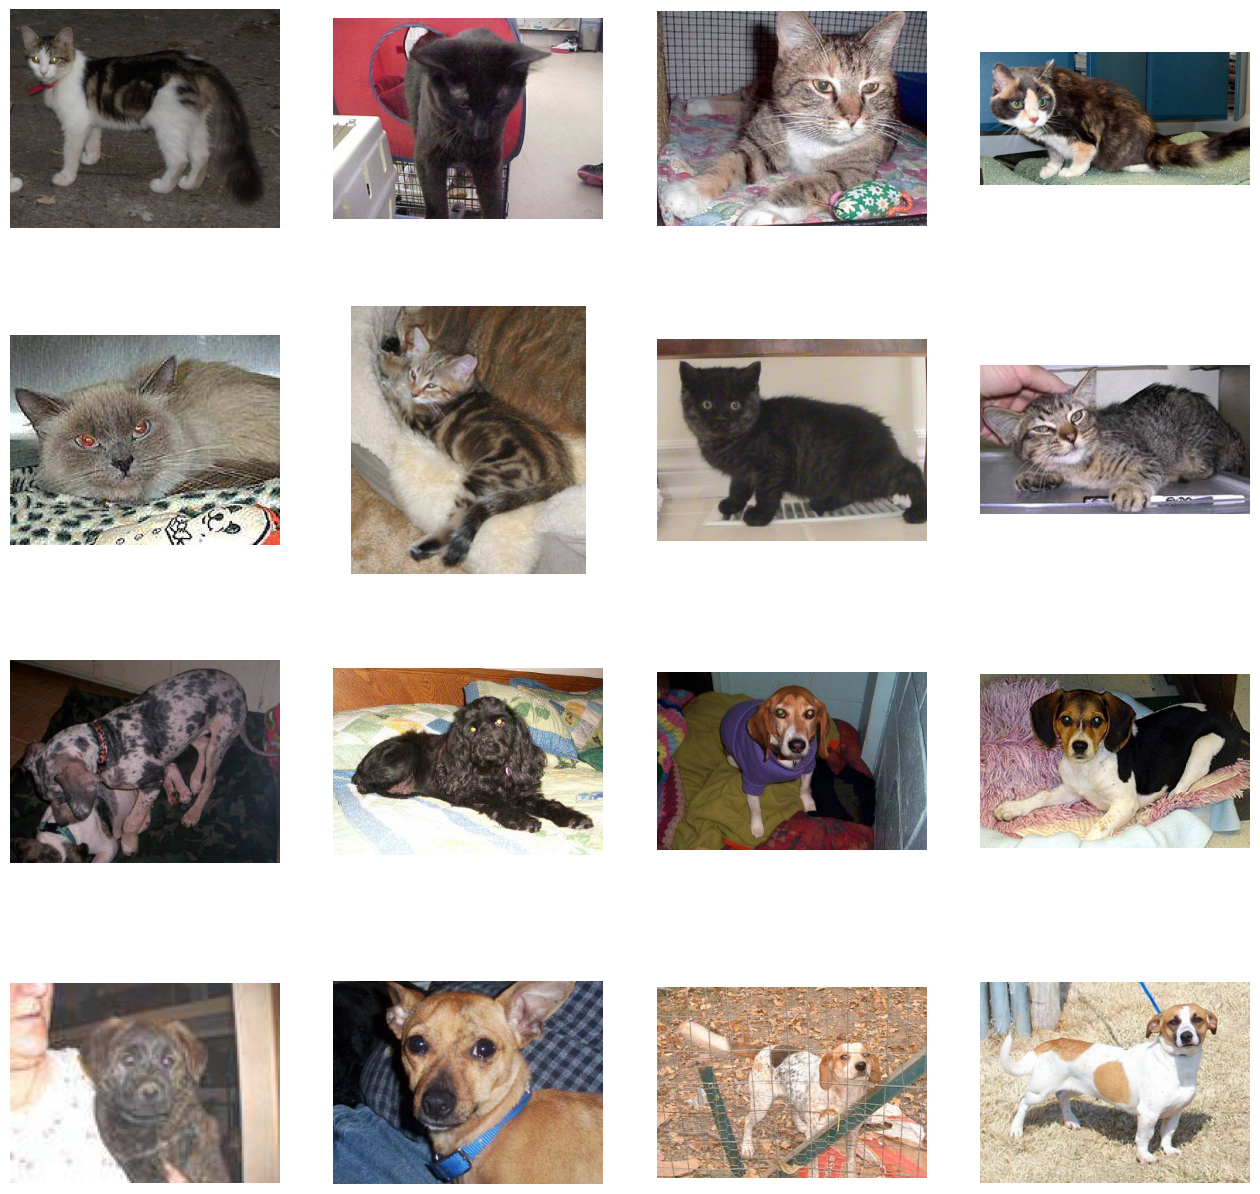

In [4]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 
  
cat_dir = os.path.join('cats_and_dogs_filtered/train/cats') 
dog_dir = os.path.join('cats_and_dogs_filtered/train/dogs') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 
  
pic_index = 210
  
cat_images = [os.path.join(cat_dir, fname) 
              for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
              for fname in dog_names[pic_index-8:pic_index]] 
  
for i, img_path in enumerate(cat_images + dog_images): 
    sp = plt.subplot(4, 4, i+1) 
    sp.axis('Off') 
  
    img = mpimg.imread(img_path) 
    plt.imshow(img) 
  
plt.show() 

## Define constants

In [5]:
base_dir = 'cats_and_dogs_filtered'

In [6]:
FAST_RUN = False
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## Build Model

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 198, 198, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 97, 97, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,448,353 (36.04 MB)

 Trainable params: 9,447,969 (36.04 MB)

 Non-trainable params: 384 (1.50 KB)

## Create datasets 

In [46]:
train_datagen = image_dataset_from_directory(base_dir+'/train', image_size=(200,200), subset='training', seed = 1, validation_split=0.1, batch_size= 10) 
test_datagen = image_dataset_from_directory(base_dir+'/validation', image_size=(200,200), subset='validation', seed = 1, validation_split=0.20, batch_size= 10)

Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


## Callbacks¶

In [47]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Learning Rate Reduction

In [48]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### Early Stop

In [49]:
earlystop = EarlyStopping(patience=10)

In [50]:
callbacks = [earlystop, learning_rate_reduction]

## Fit Mode

In [51]:
history = model.fit(train_datagen, 
                    epochs=10, 
                    validation_data=test_datagen,
                    callbacks=callbacks) 

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.8622 - loss: 0.3345 - val_accuracy: 0.5200 - val_loss: 1.5057 - learning_rate: 0.0010
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.8081 - loss: 0.4606 - val_accuracy: 0.5400 - val_loss: 1.2326 - learning_rate: 0.0010
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.7869 - loss: 0.4937 - val_accuracy: 0.6300 - val_loss: 0.7810 - learning_rate: 0.0010
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.8311 - loss: 0.3463 - val_accuracy: 0.6250 - val_loss: 0.8291 - learning_rate: 0.0010
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 295ms/step - accuracy: 0.8659 - loss: 0.3314 - val_accuracy: 0.6200 - val_loss: 0.8433 - learning_rate: 0.0010
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 298ms/step - accuracy: 0.8868 - loss: 0.2473 - val_accuracy: 0.6400 - val_loss: 0.7740 - learning_rate: 0.0010
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9

## Model Evaluation

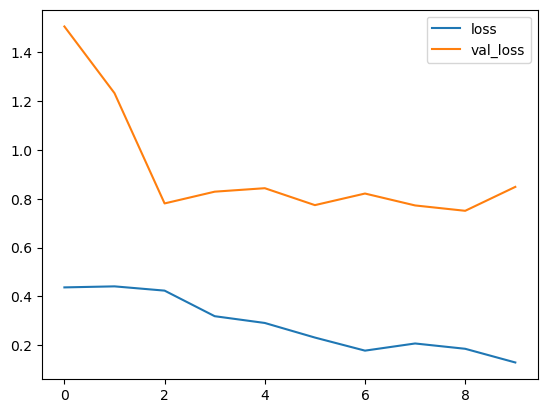

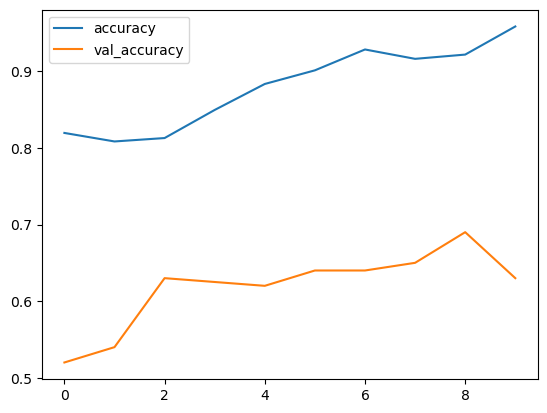

In [52]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 

## Model Testing and Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cat


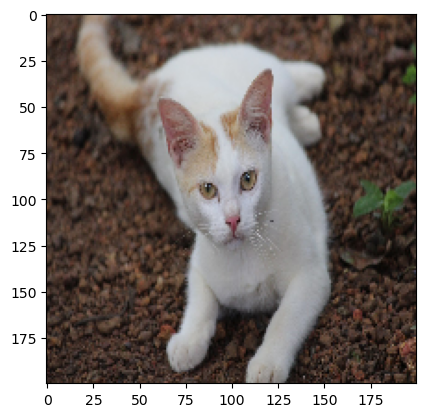

In [53]:
from keras.preprocessing import image 
  
#Input image 
test_image = image.load_img('0.jpg',target_size=(200,200)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = model.predict(test_image) 
  
#Mapping result array with the main name list 
i=0
if(result>=0.5): 
  print("Dog") 
else: 
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cat


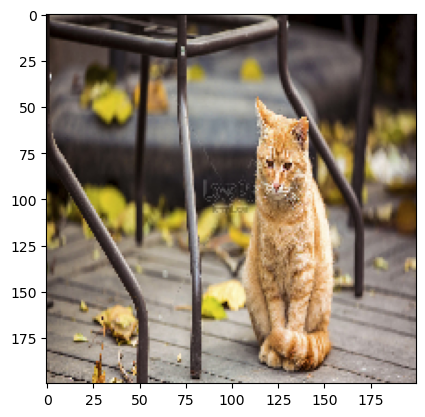

In [54]:
from keras.preprocessing import image 
  
#Input image 
test_image = image.load_img('1.jpg',target_size=(200,200)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = model.predict(test_image) 
  
#Mapping result array with the main name list 
i=0
if(result>=0.5): 
  print("Dog") 
else: 
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Dog


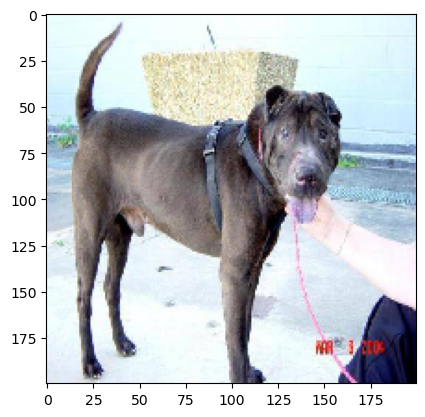

In [55]:
from keras.preprocessing import image 
  
#Input image 
test_image = image.load_img('4.jpg',target_size=(200,200)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = model.predict(test_image) 
  
#Mapping result array with the main name list 
i=0
if(result>=0.5): 
  print("Dog") 
else: 
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Dog


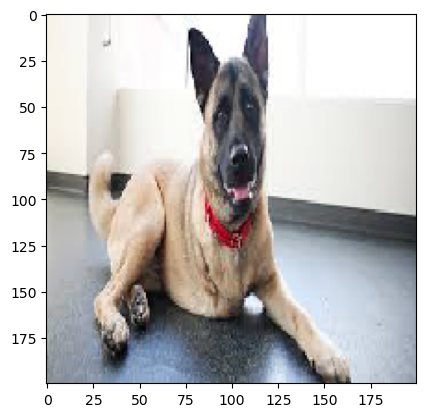

In [57]:
from keras.preprocessing import image 
  
#Input image 
test_image = image.load_img('4.jpeg',target_size=(200,200)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = model.predict(test_image) 
  
#Mapping result array with the main name list 
i=0
if(result>=0.5): 
  print("Dog") 
else: 
  print("Cat")